<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Debtor                               4424 non-null   int64  
 1   Tuition fees up to date              4424 non-null   int64  
 2   Gender                               4424 non-null   int64  
 3   Scholarship holder                   4424 non-null   int64  
 4   Age at enrollment                    4424 non-null   int64  
 5   Curricular units 1st sem (approved)  4424 non-null   int64  
 6   Curricular units 1st sem (grade)     4424 non-null   float64
 7   Curricular units 2nd sem (approved)  4424 non-null   int64  
 8   Curricular units 2nd sem (grade)     4424 non-null   float64
 9   Target                               4424 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 345.8+ KB
Binary Classification at learning rat

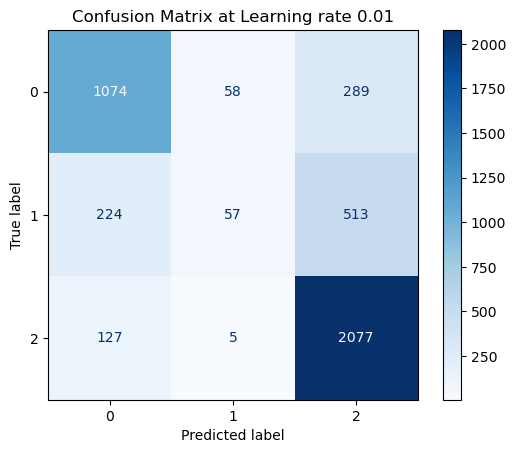

Binary Classification at learning rate 0.1
Binary Classification Results for each fold:


Fold 1- Accuracy:0.8564971751412429, Recall:0.6842105263157895, Precision:0.8405172413793104

Fold 2- Accuracy:0.848587570621469, Recall:0.6795774647887324, Precision:0.8177966101694916

Fold 3- Accuracy:0.831638418079096, Recall:0.6654929577464789, Precision:0.7777777777777778

Fold 4- Accuracy:0.8564971751412429, Recall:0.6830985915492958, Precision:0.8398268398268398

Fold 5- Accuracy:0.8529411764705882, Recall:0.7007042253521126, Precision:0.8155737704918032
Multinomial Classification at learning rate 0.1

Multinomial Classification Results for each fold:


Fold 1- Accuracy:0.7299435028248588, Recall:0.7299435028248588, Precision:0.6923224029886281, F1-Score:0.6907758539333387

Fold 2- Accuracy:0.7288135593220338, Recall:0.7288135593220338, Precision:0.7029875283616982, F1-Score:0.6840610280464412

Fold 3- Accuracy:0.7220338983050848, Recall:0.7220338983050848, Precision:0.6796672222826845, F1

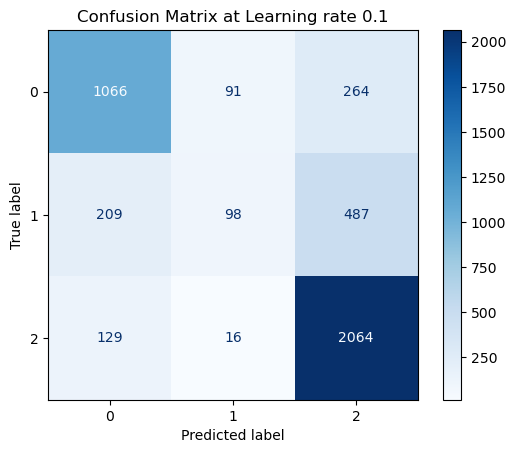

Binary Classification at learning rate 1
Binary Classification Results for each fold:


Fold 1- Accuracy:0.8576271186440678, Recall:0.6912280701754386, Precision:0.8382978723404255

Fold 2- Accuracy:0.8519774011299435, Recall:0.6936619718309859, Precision:0.8174273858921162

Fold 3- Accuracy:0.8305084745762712, Recall:0.676056338028169, Precision:0.768

Fold 4- Accuracy:0.8576271186440678, Recall:0.6866197183098591, Precision:0.8405172413793104

Fold 5- Accuracy:0.8563348416289592, Recall:0.6971830985915493, Precision:0.8284518828451883
Multinomial Classification at learning rate 1

Multinomial Classification Results for each fold:


Fold 1- Accuracy:0.7310734463276836, Recall:0.7310734463276836, Precision:0.6950215203269992, F1-Score:0.6941284004616974

Fold 2- Accuracy:0.7299435028248588, Recall:0.7299435028248588, Precision:0.7040475194285398, F1-Score:0.6865120086579501

Fold 3- Accuracy:0.7175141242937854, Recall:0.7175141242937854, Precision:0.6729917827784598, F1-Score:0.6761369

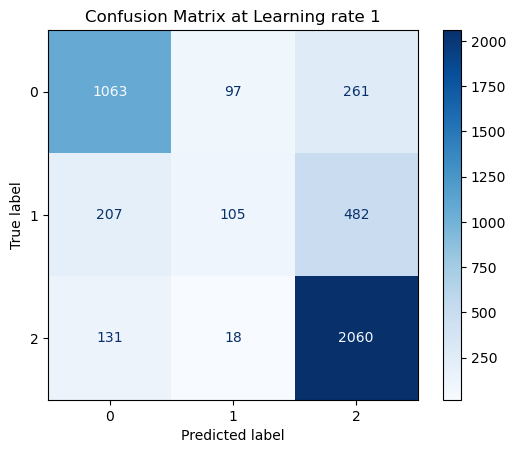

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('HW2-dataset.csv')
data.describe()
data.head()
data.tail()
data.info()
# Make a copy of the data before decoding the 'Target' column
data_copy = data.copy()

# Map the 'Target' column to binary values
data_copy['Target'] = data_copy['Target'].map({'Dropout': 1, 'Graduate': 0, 'Enrolled':0 })

# Separate features (X) and target (y)
X = data_copy.iloc[:, 0:9].values  # Features
y = data_copy.iloc[:, -1].values
X1 = data.iloc[:, 0:9].values  # Features
y1 = data.iloc[:, -1].values
Learning_rate = [0.01, 0.1, 1]


for i in Learning_rate:
    print(f"Binary Classification at learning rate {i}")
    # Task 1: Binary Classification
    binary_results = {'Accuracy': [], 'Precision': [], 'Recall': []}
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
    numofFolds = 1

    print("Binary Classification Results for each fold:\n")

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

       # Train a binary logistic regression model
        binary_classifier = LogisticRegression(max_iter=1000, C=i)
        binary_classifier.fit(X_train, y_train)

       # Make predictions
        y_pred = binary_classifier.predict(X_test)

       # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')

        binary_results['Accuracy'].append(accuracy)
        binary_results['Precision'].append(precision)
        binary_results['Recall'].append(recall)

        print(f"\nFold {numofFolds}- Accuracy:{accuracy}, Recall:{recall}, Precision:{precision}")
        numofFolds = numofFolds + 1

       # Multinomial Classification using the copied data



    multinomial_results = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
    cf1 = []
    cf2 = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
    
     
    print(f"Multinomial Classification at learning rate {i}")
    print("\nMultinomial Classification Results for each fold:\n")
    numofFoldsM = 1
    for train_index, test_index in kf.split(X1, y1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]

       # Train a multinomial logistic regression model
        multinomial_classifier = LogisticRegression(multi_class='multinomial', max_iter=10000, C=i)
        multinomial_classifier.fit(X_train, y_train)

    # Make predictions
        y_pred = multinomial_classifier.predict(X_test)
        cf1.extend(y_test)
        cf2.extend(y_pred)

    # Calculate performance metrics for multinomial classification
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        multinomial_results['Accuracy'].append(accuracy)
        multinomial_results['Precision'].append(precision)
        multinomial_results['Recall'].append(recall)
        multinomial_results['F1-Score'].append(f1)
        print(f"\nFold {numofFoldsM}- Accuracy:{accuracy}, Recall:{recall}, Precision:{precision}, F1-Score:{f1}")
        numofFoldsM = numofFoldsM + 1


 # Print the results and display the confusion matrix
    print("\nOverall Binary Classification Results:")
    print("Average Accuracy:", np.mean(binary_results['Accuracy']))
    print("Average Precision:", np.mean(binary_results['Precision']))
    print("Average Recall:", np.mean(binary_results['Recall']))

    print("\nOverall Multinomial Classification Results:")
    print("Average Accuracy:", np.mean(multinomial_results['Accuracy']))
    print("Average Precision:", np.mean(multinomial_results['Precision']))
    print("Average Recall:", np.mean(multinomial_results['Recall']))
    print("Average F1-Score:", np.mean(multinomial_results['F1-Score']))

# Confusion matrix for Multinomial Classification

    conf = confusion_matrix(cf1, cf2)

    disp = ConfusionMatrixDisplay(conf)

    disp.plot(cmap=plt.cm.Blues)

    plt.title(f"Confusion Matrix at Learning rate {i}")

    plt.show()
